In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

from altair import datum

In [3]:
stocks = data.stocks.url

In [4]:
base = alt.Chart(stocks).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
).transform_filter(
    datum.symbol == 'AAPL'
)

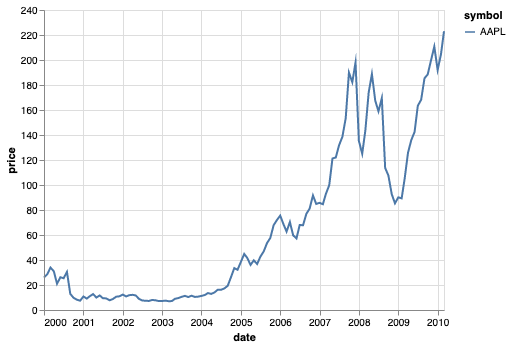

In [5]:
base.mark_line()

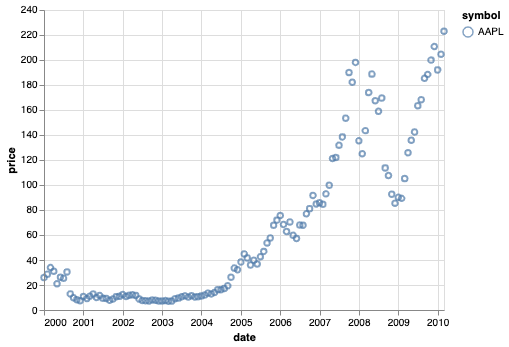

In [6]:
base.mark_point()

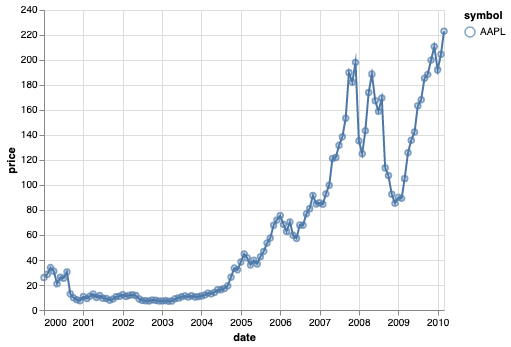

In [7]:
base.mark_line() + base.mark_point() #Create as compound Graph.

In [8]:
source = data.movies.url

In [9]:
heatmap = alt.Chart(source).mark_rect().encode(
    alt.X('IMDB_Rating:Q', bin=True),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin = True),
    alt.Color('count()', scale=alt.Scale(scheme='greenblue'))
)

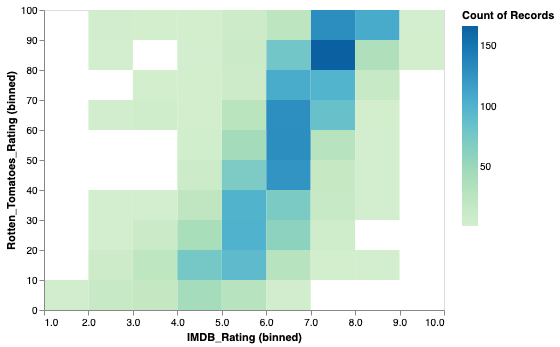

In [10]:
heatmap

In [11]:
points = alt.Chart(source).mark_circle(
    color='black',
    size=5,
).encode(
    x='IMDB_Rating:Q',
    y='Rotten_Tomatoes_Rating:Q',
)

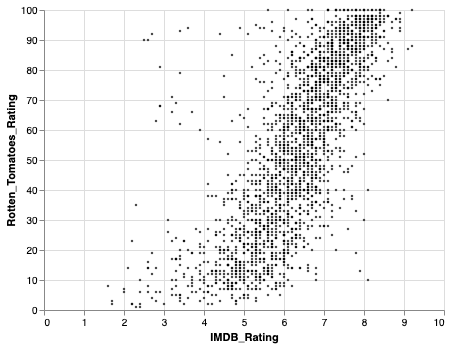

In [12]:
points

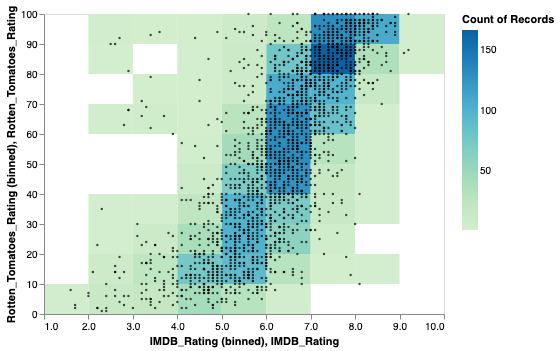

In [13]:
heatmap + points

In [14]:
iris = data.iris.url

In [15]:
chart1 = alt.Chart(iris).mark_point().encode(
    x='petalLength:Q',
    y='petalWidth:Q',
    color='species:N'
).properties(
    height=300,
    width=300
)

In [16]:
chart2 = alt.Chart(iris).mark_bar().encode(
    x='count()',
    y=alt.Y('petalWidth:Q', bin=alt.Bin(maxbins=30)),
    color='species:N'
).properties(
    height=300,
    width=300
)

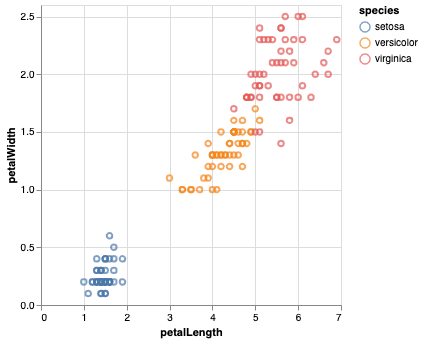

In [17]:
chart1

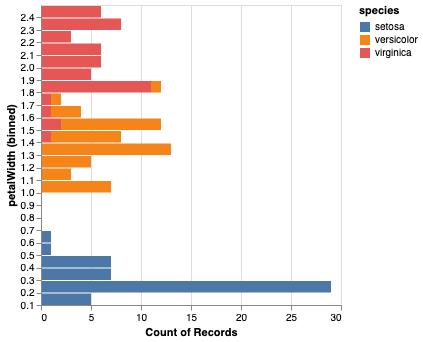

In [18]:
chart2

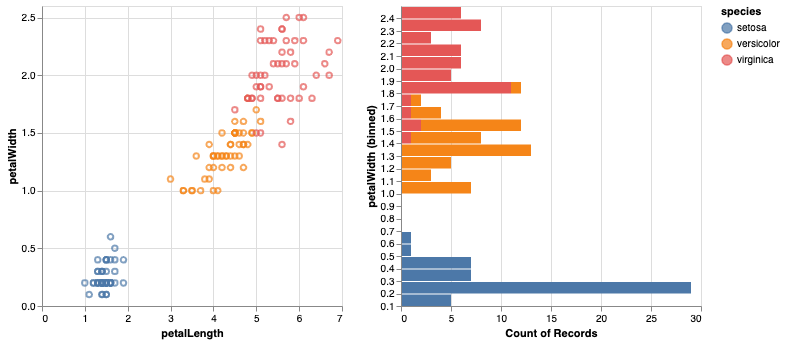

In [19]:
chart1 | chart2

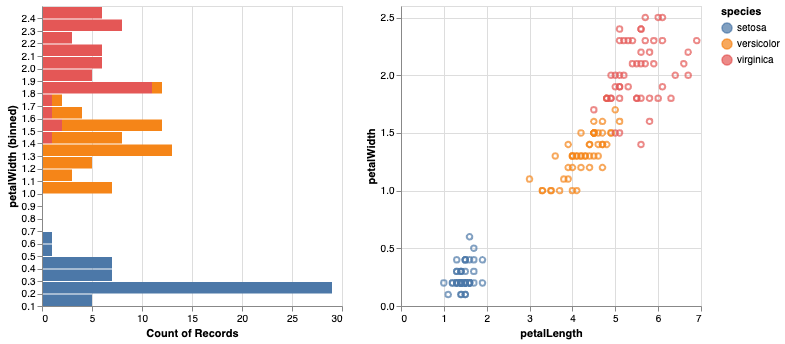

In [20]:
chart2 | chart1

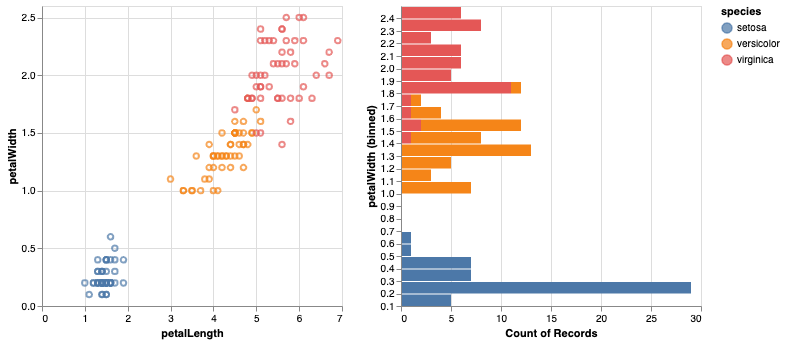

In [21]:
# Alternative to above code
alt.hconcat(chart1, chart2)

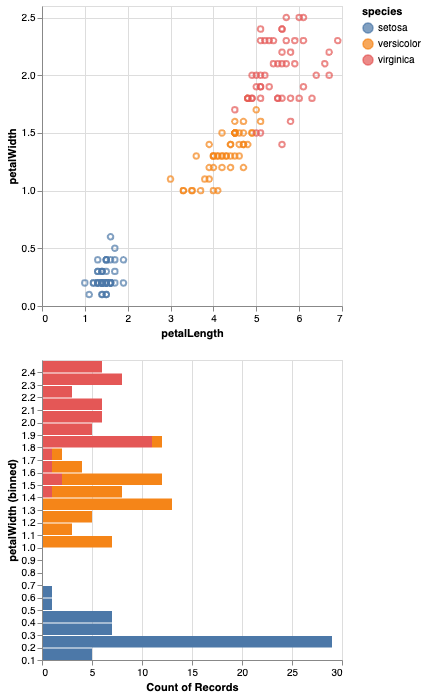

In [22]:
alt.vconcat(chart1, chart2)

In [23]:
sp500 = data.sp500.url

brush = alt.selection(type='interval', encodings=['x'])

In [24]:
upper = alt.Chart(sp500).mark_area().encode(
    x=alt.X('date:T', scale={'domain': brush.ref()}),
    y='price:Q'
).properties(
    width=600,
    height=200
)

lower = upper.properties(
    height=60
).add_selection(brush)

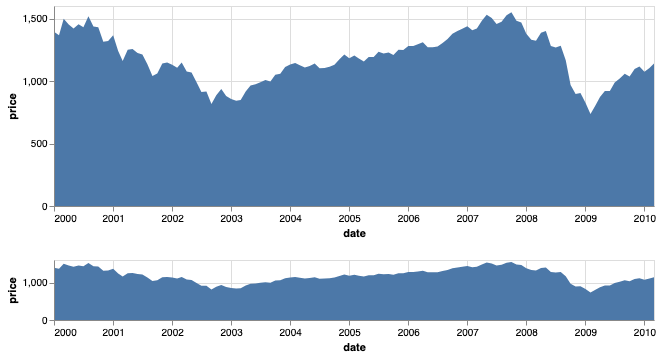

In [25]:
alt.vconcat(upper, lower)

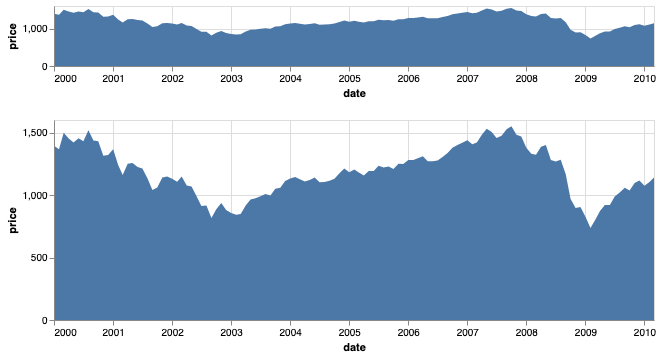

In [26]:
alt.vconcat(lower, upper)